# SED CA3 w/ Machine Learning and `sklearn`

In [61]:
import pandas as pd
import matplotlib.pylab as plt

<AxesSubplot:title={'center':'CA3 SED'}, xlabel='Frequency (GHz)', ylabel='Flux (Jy/beam)'>

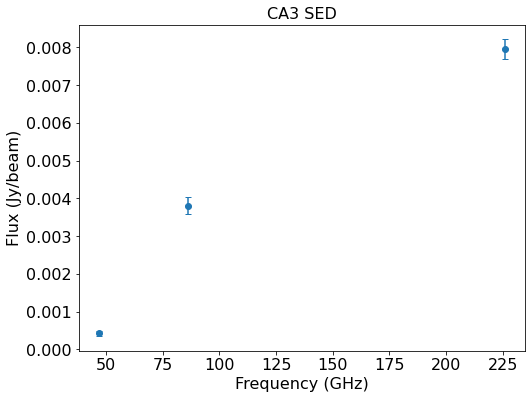

In [62]:
df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/hiiregion_W51_CA3.csv')  

def SED_plot():
    fontsize = 16
    fig, ax = plt.subplots(figsize=(8,6))
    plt.title("CA3 SED", fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xlabel("Frequency (GHz)", fontsize=fontsize)
    ax.set_ylabel("Flux (Jy/beam)", fontsize=fontsize)
    ax.errorbar(df.mu, df.amp, yerr=df.amp_error, fmt='o', capsize=3)
    
    return ax

SED_plot()

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [64]:
import numpy as np

In [103]:
df=df.iloc[::-1]

In [104]:
mu = df.mu.values
amp = df.amp.values
mu = mu.reshape(-1,1)

In [105]:
poly = PolynomialFeatures(1)

In [106]:
mu_poly = poly.fit_transform(mu)
linreg = LinearRegression()
linreg.fit(mu_poly, amp)

LinearRegression()

In [107]:
poly.fit(mu_poly, amp)

PolynomialFeatures(degree=1)

<AxesSubplot:title={'center':'CA3 SED'}, xlabel='Frequency (GHz)', ylabel='Flux (Jy/beam)'>

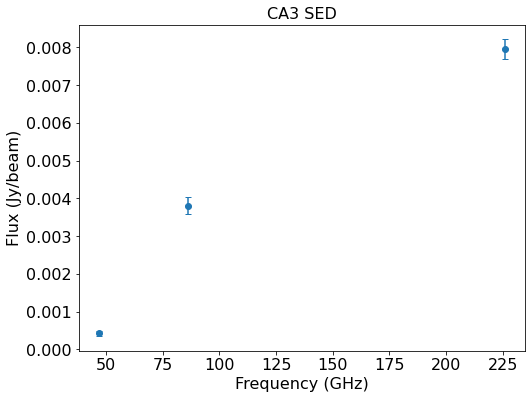

In [108]:
SED_plot()

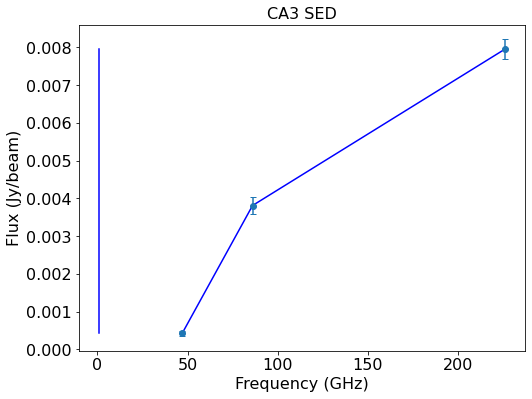

In [109]:
SED_plot()
plt.plot(mu_poly, amp, color='blue')

In [72]:
mu

array([[226.  ],
       [ 86.  ],
       [ 46.99]])

In [73]:
amp.reshape(-1,1)

array([[0.00795 ],
       [0.00381 ],
       [0.000427]])

## Second method

In [74]:
#X is mu and y is flux
X = df.iloc[:, 0:1].values
y = df.iloc[:,1].values

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [110]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

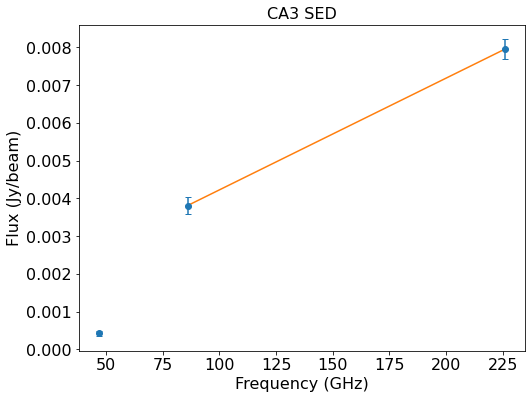

In [111]:
SED_plot()
plt.plot(X_train, y_train)

In [112]:
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree = 4)
X_polynom = polynom.fit_transform(X_train)

X_polynom

array([[1.00000000e+00, 8.60000000e+01, 7.39600000e+03, 6.36056000e+05,
        5.47008160e+07],
       [1.00000000e+00, 2.26000000e+02, 5.10760000e+04, 1.15431760e+07,
        2.60875778e+09]])

In [79]:
PolyReg = LinearRegression()
PolyReg.fit(X_polynom, y_train)

LinearRegression()

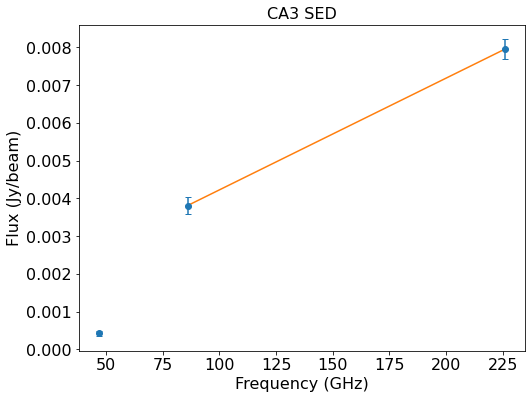

In [113]:
SED_plot()
plt.plot(X_train, PolyReg.predict(polynom.fit_transform(X_train)))

In [115]:
mu = df.mu.values
amp = df.amp.values

def fitdata(x,t,M):
	'''fitdata(x,t,M): Fit a polynomial of order M to the data (x,t)'''	
	#This needs to be filled in
	X = np.array([x**m for m in range(M+1)]).T
	w = np.linalg.inv(X.T@X)@X.T@t
	return w

        
M = 1
w = fitdata(mu,amp,M)
xrange = np.arange(0,200,0.001)  #get equally spaced points in the xrange
X = np.array([xrange**m for m in range(w.size)]).T
esty = X@w #compute the predicted value

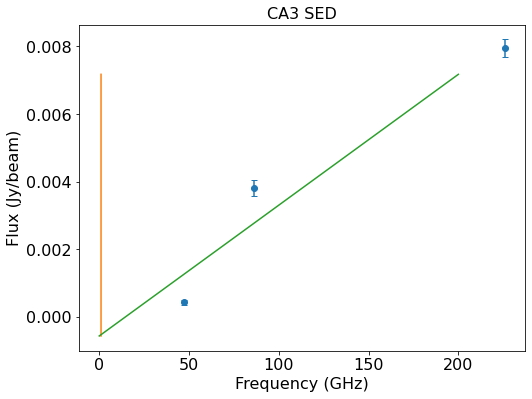

In [116]:
SED_plot()
plt.plot(X,esty)

In [99]:
mu

array([226.  ,  86.  ,  46.99])

In [100]:
amp

array([0.00795 , 0.00381 , 0.000427])

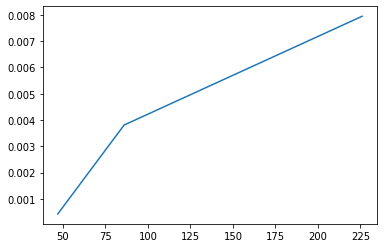

In [101]:
plt.plot(mu,amp)